# `brainpy.inputs` module

`brainpy.inputs` module aims to provide several commonly used helper functions to help construct input currents. 

In [1]:
import brainpy as bp

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(current, duration, title):
    ts = np.arange(0, duration, 0.1)
    plt.plot(ts, current)
    plt.title(title)
    plt.xlabel('Time [ms]')
    plt.ylabel('Current Value')
    plt.show()

## brainpy.inputs.section_input

`brainpy.inputs.section_input()` is an updated function of previous `brainpy.inputs.constant_input()` (see below). 

Sometimes, we need input currents with different values in different periods. For example, if you want to get an input in which 0-100 ms is zero, 100-400 ms is value 1., and 400-500 ms is zero, then, you can define:

In [3]:
current, duration = bp.inputs.section_input(values=[0, 1., 0.],
                                           durations=[100, 300, 100],
                                           return_length=True)

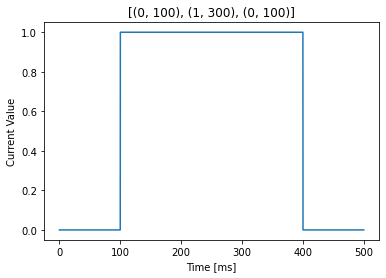

In [4]:
show(current, duration, '[(0, 100), (1, 300), (0, 100)]')

## brainpy.inputs.constant_input

`brainpy.inputs.constant_current()` function helps you to format constant current in several periods.

For the input created above, we can define it again with `constant_current()` by:

In [5]:
current, duration = bp.inputs.constant_current([(0, 100), (1, 300), (0, 100)])

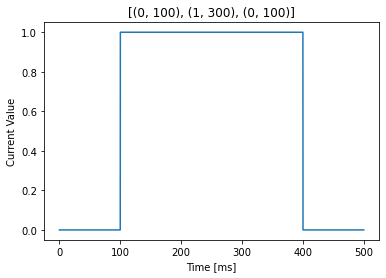

In [6]:
show(current, duration, '[(0, 100), (1, 300), (0, 100)]')

Another example is this:

In [7]:
current, duration = bp.inputs.constant_current([(-1, 10), (1, 3), (3, 30), (-0.5, 10)], 0.1)

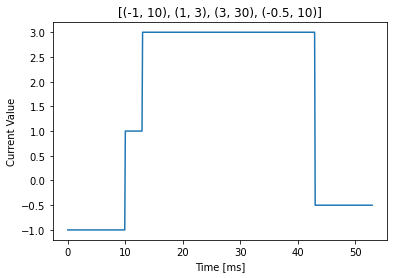

In [8]:
show(current, duration, '[(-1, 10), (1, 3), (3, 30), (-0.5, 10)]')

## brainpy.inputs.spike_input

`brainpy.inputs.spike_input()` helps you to construct an input like a series of short-time spikes. It receives the following settings:

- `points` :  The spike time-points. Must be an iterable object. For example, list, tuple, or arrays.
- `lengths` : The length of each point-current, mimicking the spike durations. It can be a scalar float to specify the unified duration. Or, it can be list/tuple/array of time lengths with the length same with `points`. 
- `sizes` : The current sizes. It can be a scalar value. Or, it can be a list/tuple/array of spike current sizes with the length same with `points`.
- `duration` : The total current duration.
- `dt` : The time step precision. The default is None (will be initialized as the default `dt` step). 

For example, if you want to generate a spike train at 10 ms, 20 ms, 30 ms, 200 ms, 300 ms,
    and each spike lasts 1 ms and the spike current is 0.5, then you can use the
    following funtions:

In [9]:
current = bp.inputs.spike_input(points=[10, 20, 30, 200, 300],
            lengths=1.,  # can be a list to specify the spike length at each point
            sizes=0.5,  # can be a list to specify the spike current size at each point
            duration=400.)

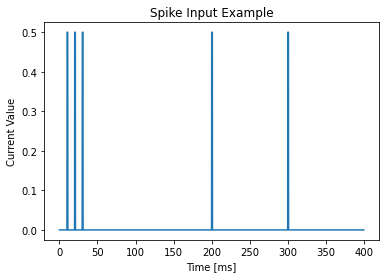

In [10]:
show(current, 400, 'Spike Input Example')

## brainpy.inputs.ramp_input

`brainpy.inputs.ramp_input()` mimics a ramp or a step current to the input of the circuit. It receives the following settings:

- `c_start` : The minimum (or maximum) current size.
- `c_end` : The maximum (or minimum) current size.
- `duration` : The total duration.
- `t_start` : The ramped current start time-point.
- `t_end` : The ramped current end time-point. Default is the None.
- `dt` : The current precision.

We illustrate the usage of `brainpy.inputs.ramp_input()` by two examples.

In the first example, we increase the current size from 0. to 1. between the start time (0 ms) and the end time (1000 ms). 

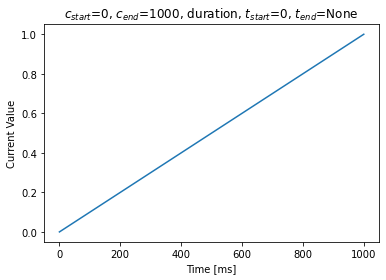

In [11]:
duration = 1000
current = bp.inputs.ramp_input(0, 1, duration)

show(current, duration, r'$c_{start}$=0, $c_{end}$=%d, duration, '
                        r'$t_{start}$=0, $t_{end}$=None' % (duration))

In the second example, we increase the current size from 0. to 1. from the 200 ms to 800 ms.

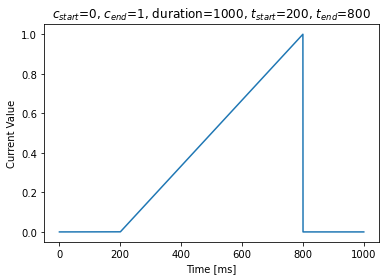

In [12]:
duration, t_start, t_end = 1000, 200, 800
current = bp.inputs.ramp_input(0, 1, duration, t_start, t_end)

show(current, duration, r'$c_{start}$=0, $c_{end}$=1, duration=%d, '
                        r'$t_{start}$=%d, $t_{end}$=%d' % (duration, t_start, t_end))